<a href="https://colab.research.google.com/github/nchaudhary1/LogisticRegresion_project/blob/main/Knn42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style = 'white', color_codes = True)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Print the dimensions of datasets
print('Dimension of dataset:', data.shape)
print('Number of rows of dataset:',data.shape[0])
print('Number of columns of dataset:', data.shape[1])

Dimension of dataset: (150, 5)
Number of rows of dataset: 150
Number of columns of dataset: 5


In [8]:
#print the attributes column names 
data.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

**Exploratory Data Analysis**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#get the descriptive statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


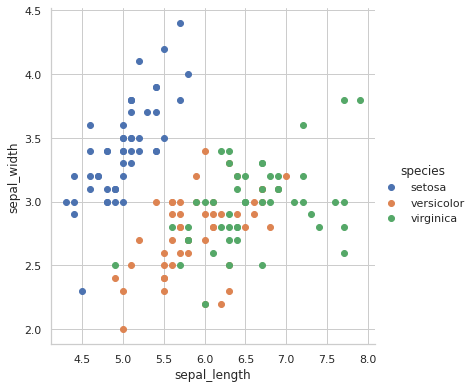

In [13]:
#2-D Scatter plot 
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(data, hue ='species', size = 5.5) \
.map(plt.scatter, 'sepal_length','sepal_width') \
.add_legend()
plt.show()


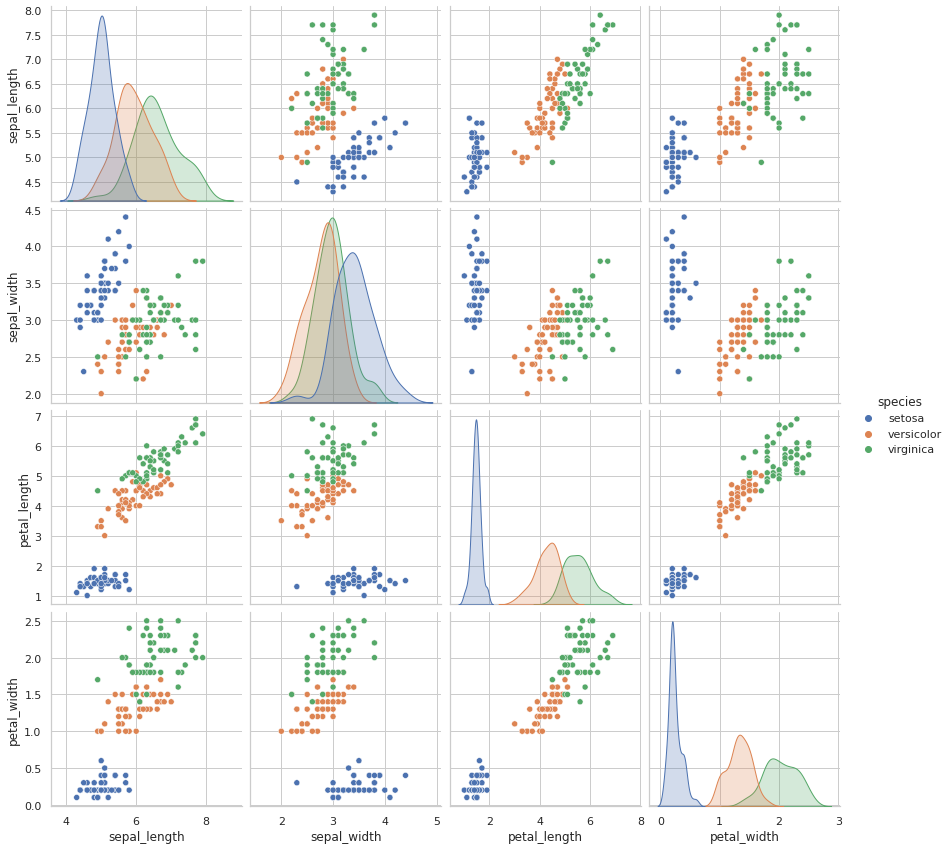

In [14]:
#Pairplot on the data
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'species', size = 3)
plt.show()

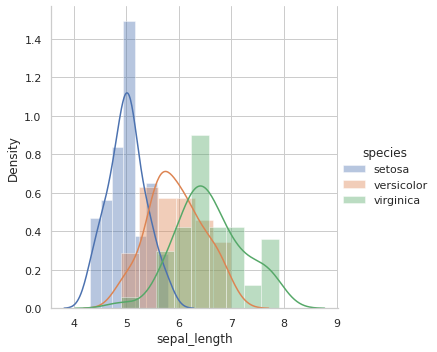

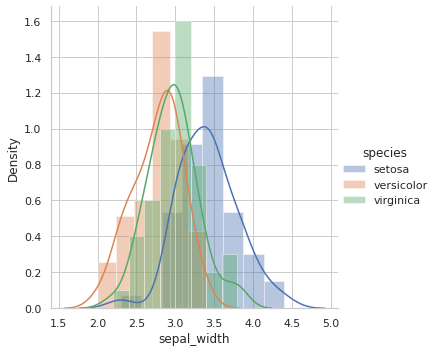

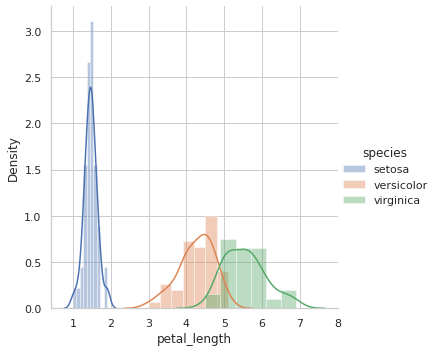

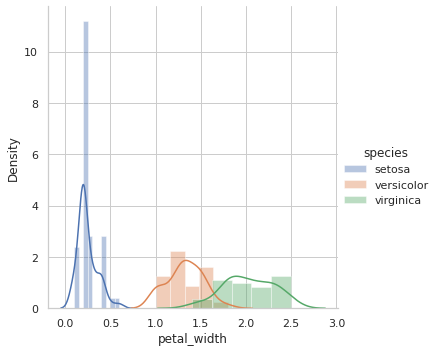

In [15]:
#Univariate analysis using pdf
for name in data.columns.values[:-1]:
  sns.FacetGrid(data, hue = 'species', size = 5).map(sns.distplot, name).add_legend()
plt.show()

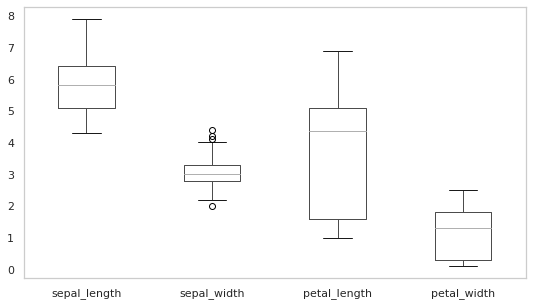

In [16]:
data.boxplot(column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], figsize = (9,5), grid = False)

In [17]:
#Identifing the missing values 
miss_values = data.isna().sum()

In [18]:
miss_values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
#Extracting dataframe for only object datatypes 
data_ob = data.select_dtypes(include = 'object')
data_ob.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [21]:
#Extracting dataframe for only numeric datatypes
data_num = data.select_dtypes(include=['int64','float64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
#data points for each class
data.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species Distribution')

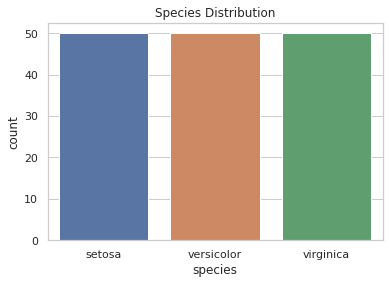

In [26]:
#count plot for species 
sns.countplot(data['species'])
plt.title('Species Distribution')

In [27]:
#check the unique values of species 
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
#showing the overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
#constructing the correlation matrix
corr = data_num.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


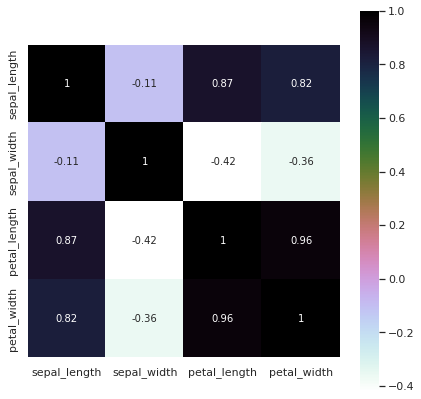

In [30]:
#heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot = True, cmap = 'cubehelix_r', square = True)

In [31]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X.shape

(150, 4)

In [32]:
Y.shape

(150,)

In [33]:
#splitting the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
Y_test.shape

(120, 4)
(30, 4)
(120,)


(30,)

In [36]:
#Using KNN classifier for model building
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
#Predict species for test data
pred = KNN.predict(X_test)
pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [39]:
#validiation of built model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
print('The accuracy of the KNN with k = 3 is {}%'.format(round(accuracy_score(Y_test, pred)*100,2)))

1.0
The accuracy of the KNN with k = 3 is 100.0%


**GridSearchCV**


In [40]:
#Tuning parameters using gridsearch cross validation
from sklearn.model_selection import GridSearchCV

In [43]:
knn_params = {'n_neighbors': list(range(1,16,1)), 'metric':['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5)
grid_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [44]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [45]:
#print hyperparameter
print('Tuned hyperparameter: {}'.format(grid_knn.best_params_))
print('Best score: {}'.format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 11}
Best score: 0.975


In [47]:
#Using the best hyperparameter
knn = knn_besthypr.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print('The accuracy of the KNN with k = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with k = 11 is 96.67%


In [50]:
Y_test

0                                                          setosa
1                                                      versicolor
2                                                      versicolor
3                                                          setosa
4                                                       virginica
5                                                      versicolor
6                                                       virginica
7                                                          setosa
8                                                          setosa
9                                                       virginica
10                                                     versicolor
11                                                         setosa
12                                                      virginica
13                                                     versicolor
14                                                     versicolor
15        

In [49]:
#let see the actual and predicted values 
Y_test = Y_test.reset_index(drop = True)
Y_test['pred_species'] = y_pred
Y_test

0                                                          setosa
1                                                      versicolor
2                                                      versicolor
3                                                          setosa
4                                                       virginica
5                                                      versicolor
6                                                       virginica
7                                                          setosa
8                                                          setosa
9                                                       virginica
10                                                     versicolor
11                                                         setosa
12                                                      virginica
13                                                     versicolor
14                                                     versicolor
15        